# Полиномиальная регрессия

Как быть, когда ваша линейная регрессия показывает низкое качество, потому что данные не линейные, а более сложные?

Модель линейной регрессии можно сделать более гибкой, если использовать нелинейные функции от исходных предикторов – такой подход называется *полиномиальной регрессией*.

# Подготовка

## Импорт библиотек

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

## Загрузка данных

In [7]:
data = pd.read_csv('non_linear.csv', sep=',')
data.head()

,x_train,y_train
0,0.138368,0.838812
1,0.157237,0.889313
2,0.188684,1.430040
3,0.685553,1.717309
4,0.874237,2.032588


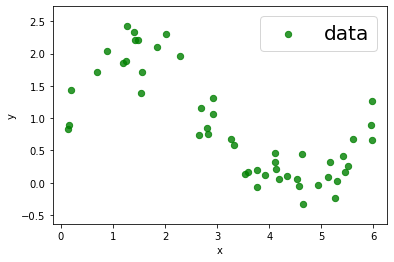

In [8]:
margin = 0.3

# основной график
plt.scatter(data.x_train, data.y_train, 40, 'g', 'o', alpha=0.8, label='data')

# различные "украшения"
plt.xlim(data['x_train'].min() - margin, data['x_train'].max() + margin)
plt.ylim(data['y_train'].min() - margin, data['y_train'].max() + margin)
plt.legend(loc='upper right', prop={'size': 20})
plt.xlabel('x')
plt.ylabel('y')
plt.show()

# Создание модели

То есть для $\text{degree}=5$ получили матрицу с числом колонок $5$. То есть из одной фичи мы делаем $n$ фичей, где $n$ – размерность полинома. Давайте посмотрим, как выглядит линейная регрессия, обученная на полиномах различных степеней. Для этого напишем функцию (чтобы не копипастить код) которая не делает ничего сложного:
* генерит данные для заданной степени полинома
* обучает модель
* строит график решения

In [9]:
def generate_degrees(source_data: list, degree: int):
    """Функция, которая принимает на вход одномерный массив, а возвращает n-мерный
    
    Для каждой степени от 1 до  degree возводим x в эту степень
    """
    return np.array([
          source_data**n for n in range(1, degree + 1)  
    ]).T

def train_polynomial(degree, data):
    """Генерим данные, тренируем модель
    
    дополнительно рисуем график
    """
    
    X = generate_degrees(data['x_train'], degree)

    model = LinearRegression().fit(X, data['y_train'])
    y_pred = model.predict(X)

    error = mean_squared_error(data['y_train'], y_pred)
    print("Степень полинома %d Ошибка %.3f" % (degree, error))

    plt.scatter(data['x_train'], data['y_train'], 40, 'g', 'o', alpha=0.8, label='data')
    plt.plot(data['x_train'], y_pred)

Основная задача – подобрать ту степень полинома, которая будет уменьшать размер ошибки

В реальных задачах "глазами" ничего не понять – потому что в реальных задачах могут быть десятки переменных, уже нельзя просто глазами контролировать, как наша прямая ляжет в облако точек. Поэтому ориентироваться можно только на  какую-то метрику (например MSE).

Давайте посмотрим, как  ошибка связана со степенью полинома

Степень 2

Степень полинома 2 Ошибка 0.298


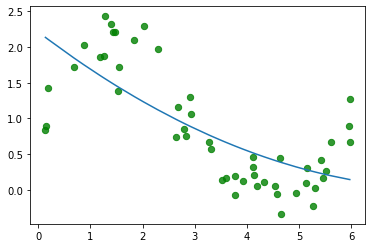

In [10]:
degree = 2

train_polynomial(degree, data)

Степень 3

Степень полинома 3 Ошибка 0.071


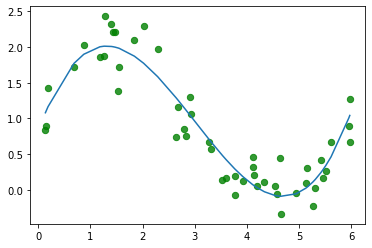

In [11]:
degree = 3

train_polynomial(degree, data)

Степень 5

Степень полинома 5 Ошибка 0.067


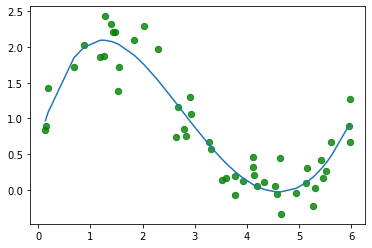

In [12]:
degree = 5

train_polynomial(degree, data)

Степень 11

Степень полинома 11 Ошибка 0.058


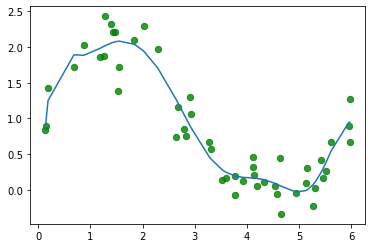

In [13]:
degree = 11

train_polynomial(degree, data)

Степень 25

Степень полинома 25 Ошибка 0.106


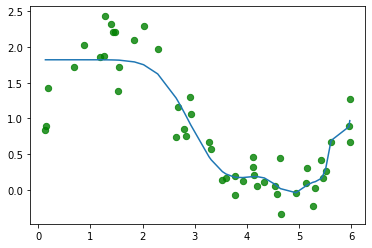

In [14]:
degree = 25

train_polynomial(degree, data)

Как видно, с ростом степени полинома ошибка сначала уменьшается, а потом снова начинает расти. Наша модель начинает описывать данные всё лучше и лучше, даже слишком хорошо – интуитивно понятно, что это снижает обобщающую способность модели, то есть новые данные модель будет предсказывать хуже, чем обучающую выборку.